In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### A1 Exploring the dataset (1.5 marks)

In [ ]:
student_list = pd.read_csv("Student_List.csv")
student_list.head()

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1640,18,Some College,10.318918,5,No,2,No,Yes,No,No,2.655994,C
1,2939,16,Bachelor's,6.517803,2,Yes,2,No,Yes,No,No,3.474562,B
2,2877,15,Some College,0.815700,1,No,1,No,No,Yes,Yes,2.806878,C
3,1628,16,High School,6.304335,8,No,3,No,No,No,No,2.150546,D
4,2052,15,Some College,2.516047,14,Yes,3,Yes,No,No,No,2.253871,D


1. How many students are there in this dataset?

In [ ]:
student_list.shape
# 1500 students (1500 rows)

(1500, 13)

2. What is the age range of students in this dataset?

In [ ]:
age_range = max(student_list["Age"]) - min(student_list["Age"])
age_range
# age range is 3 years

3

3. Identify and discuss the data types of each column in the dataset.

In [ ]:
student_list.dtypes

StudentID              int64
Age                    int64
ParentalEducation     object
StudyTimeWeekly      float64
Absences               int64
Tutoring              object
ParentalSupport        int64
Extracurricular       object
Sports                object
Music                 object
Volunteering          object
GPA                  float64
GradeClass            object
dtype: object

- The data types for student ID is integer as it only consists of numbers
- The data types for Age is integer
- The data types for ParentalEducation is object as it consists of a string of characters for each category
- The data types for StudyTimeWeekly is float as it contains decimal values
- The data types for Absences is integer (number of times of absence)
- The data types for Tutoring is object made up of string characters 'Yes' or 'No'
- The data types for ParentalSupport is integer, the greater the integer value, the higher the support
- The data types for Extracurricular, Sports, Music and Volunteering are objects
- The data types for GPA is float (consists of decimal values)
- The data types for GradeClass is object stored in strings of characters

4. GradeClass corresponds to different categories of grades, where, for example, 'A'
corresponds to the highest grade (GPA ≥ 3.5) and 'F' corresponds to the lowest grade
(GPA < 2.0). Calculate the percentage of students in each grade category.

In [ ]:
fun = {'GradeClass':'count'}
groupbyClassGrade = student_list.groupby('GradeClass').agg(fun)
groupbyClassGrade.rename(
    columns = {'GradeClass':'number'},
    inplace = True
)
groupbyClassGrade = groupbyClassGrade.reset_index()
groupbyClassGrade['percentage'] = groupbyClassGrade.number/sum(groupbyClassGrade.number)*100
groupbyClassGrade

,GradeClass,number,percentage
0,A,60,4.000000
1,B,183,12.200000
2,C,244,16.266667
3,D,248,16.533333
4,F,765,51.000000


5. Create a pie chart to show the proportion of students in each GradeClass and discuss
your observations.

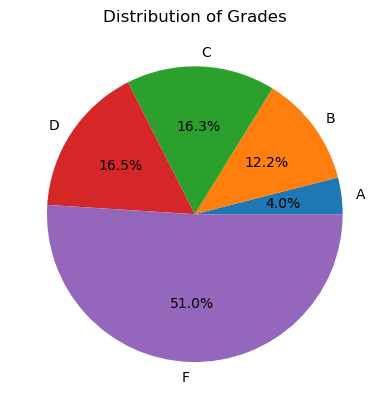

In [ ]:
plt.pie(groupbyClassGrade['percentage'], labels=groupbyClassGrade['GradeClass'], autopct='%1.1f%%')
plt.title('Distribution of Grades')
plt.show()

- based on the pie chart, only 4 percent of students get A for their grades
- while more than half (51 percent) of students got an F grade
- This reflects that the overall performance of students in their academics is poor
- This might be because the subject is too challenging for most students
- This might also reflect some problems in the school's teaching style or students in this school are just generally weak in their academics but good in other aspects
- The school needs to come up with plans to improve the overall grades of students

### A2 Exploring Parental Education (1.5 marks)

1. Determine the frequency of different levels of parental education.
-  How many parents have the highest education level (denoted by Higher) in
this datase
-  How many have no educaton
  - ● What is the most common level of parental education?

In [ ]:
fun2 = {'ParentalEducation':"count"}
groupbyEducation = student_list.groupby('ParentalEducation').agg(fun2)
groupbyEducation.rename( columns = {'ParentalEducation':'number'}, inplace = True)
groupbyEducation = groupbyEducation.reset_index()
groupbyEducation

,ParentalEducation,number
0,Bachelor's,234
1,High School,458
2,Higher,77
3,No Education,154
4,Some College,577


- 77 parents have the highest education level
- 154 parents have no education
- The most common level of parental education is 'some college'

2. Replace the values in the 'ParentalEducation' column according to the following
table:

In [ ]:
replace_frame = {'No Education':0,'High School':1,'Some College':2,"Bachelor's":3,'Higher':4}
student_list['ParentalEducation'] = student_list['ParentalEducation'].replace(replace_frame)
student_list.infer_objects(copy=False)

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1640,18,2,10.318918,5,No,2,No,Yes,No,No,2.655994,C
1,2939,16,3,6.517803,2,Yes,2,No,Yes,No,No,3.474562,B
2,2877,15,2,0.815700,1,No,1,No,No,Yes,Yes,2.806878,C
3,1628,16,1,6.304335,8,No,3,No,No,No,No,2.150546,D
4,2052,15,2,2.516047,14,Yes,3,Yes,No,No,No,2.253871,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1944,15,0,10.596678,12,No,1,No,No,No,Yes,1.621012,F
1496,1566,16,2,3.278634,4,Yes,4,Yes,No,No,No,3.244882,B
1497,3268,18,2,7.598010,0,Yes,3,No,No,No,No,3.040730,F
1498,3237,17,2,15.078754,24,No,4,No,No,Yes,No,1.245091,F


3. Use a boxplot to visualise the distribution of GPA for each level of ParentalEducation.
Looking at the boxplot, what can you say about the relationship between parental
education and the students’ GPA?

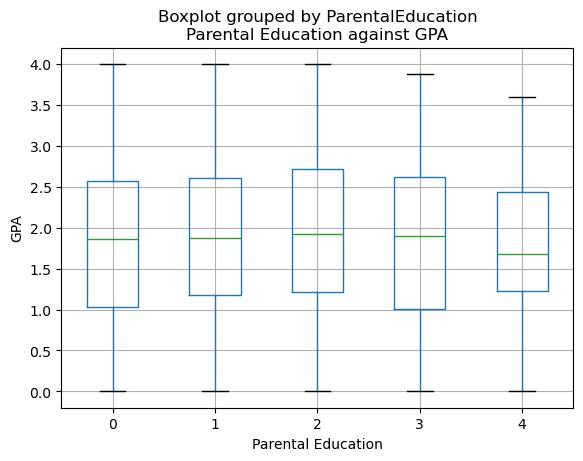

In [ ]:
student_list.boxplot(column = 'GPA', by = 'ParentalEducation')
plt.title("Parental Education against GPA")
plt.xlabel('Parental Education')
plt.ylabel('GPA')
plt.show()

- Based on hypothesis, parents with higher education level should have children with better GPA
- as it is assumed that parents from higher education level find better jobs and can provide better conditions to their children in many aspects including education
- However, based on the box plot, the GPA distribution of students across all parental education levels have roughly the same distribution (spread) and median
- Instead, parents with Bachelor's and Higher education shows a slight decline in student's GPA in terms of median and range.
- This may be because these parents are too busy to monitor student's academics, thus leading to a decline in GPA
- This shows that the parental education has no obvious relation with the student's GPA

### A3. GPA distribution and Correlation Analysis (1.5 marks)

1. Create a histogram to visualise the distribution of GPA. Summarise your
observations.

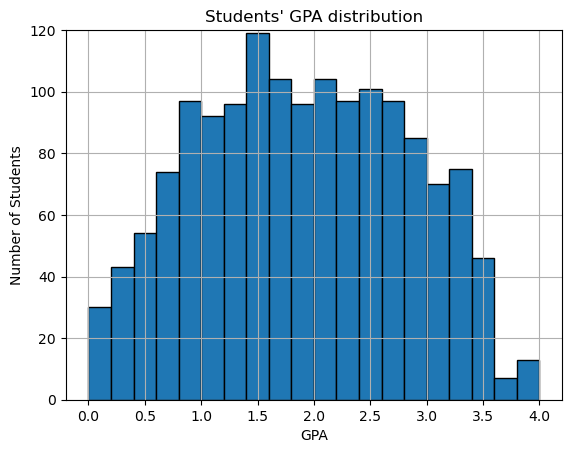

In [ ]:
student_list.GPA.hist(bins = 20,edgecolor='black')
plt.ylim(0,120)
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.title("Students' GPA distribution")
plt.grid(True)

- Overall, the distribution of student's GPA is roughly bell-shaped
- The peak of the histogram shows that most students get a GPA between the range 1.5 and 3.0
- There are less students getting GPA below 1.0 and above 3.5

2. Does a higher weekly study time correlate with better GPA? Use a scatter plot to
visualise this relationship and calculate the correlation coefficient.

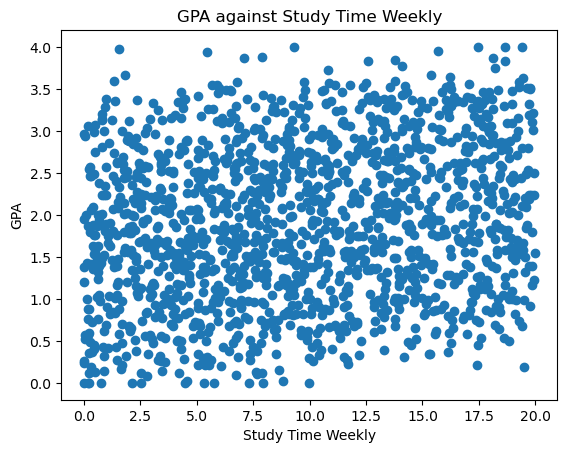

In [ ]:
plt.scatter(student_list['StudyTimeWeekly'],student_list['GPA'])
plt.xlabel('Study Time Weekly')
plt.ylabel('GPA')
plt.title('GPA against Study Time Weekly')
plt.show()

In [ ]:
Correlation_coefficient = student_list['StudyTimeWeekly'].corr(student_list['GPA'])
Correlation_coefficient

0.19049313037112514

- From the scatter plot, although there is a slight trend that when student's weekly study time increases, their GPA increases, it is very weak
- There is no clear pattern or trend that indicates a strong relationship between weekly study time and GPA the scatter plot is quite spread out
- The correlation coefficient between weekly study time and GPA, which is 0.19 shows a weak positive relationship.

3. How about any correlation between absences and GPA? Use a scatter plot to
visualise this relationship and calculate the correlation coefficient.

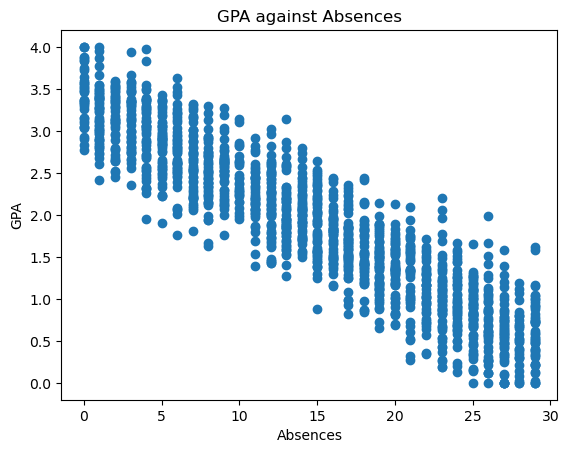

In [ ]:
plt.scatter(student_list['Absences'],student_list['GPA'])
plt.xlabel('Absences')
plt.ylabel('GPA')
plt.title('GPA against Absences')
plt.show()

In [ ]:
correlation = student_list['Absences'].corr(student_list['GPA'])
correlation

-0.9194876943290949

- based on the scatter plot, the pattern ot trend shows an obvious decrease in GPA as the number of absences increases
- The correlation coefficient between the number of absences and GPA is -0.9195 which is strong negative correlation

### A4. Extracurricular Activities (1.5 marks)

1. Select a list of students who are involved in Sports, Music, Volunteering and
Extracurricular activities. How many students are there? Assume this is called group
A.

In [ ]:
student_list.head()

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1640,18,2,10.318918,5,No,2,No,Yes,No,No,2.655994,C
1,2939,16,3,6.517803,2,Yes,2,No,Yes,No,No,3.474562,B
2,2877,15,2,0.815700,1,No,1,No,No,Yes,Yes,2.806878,C
3,1628,16,1,6.304335,8,No,3,No,No,No,No,2.150546,D
4,2052,15,2,2.516047,14,Yes,3,Yes,No,No,No,2.253871,D


In [ ]:
A = student_list[(student_list.Sports == 'Yes') & (student_list.Music == 'Yes') & (student_list.Extracurricular == 'Yes') & (student_list.Volunteering == 'Yes')]
len(A)

5

- There are 5 students in group A

2. Now Select students who did not involve in any of the above activities. How many
students are there? Assume this is called group B.

In [ ]:
B = student_list[(student_list.Sports == 'No') & (student_list.Music == 'No') & (student_list.Extracurricular == 'No') & (student_list.Volunteering == 'No')]
len(B)

432

- There are 432 students in group B

3. Compare the mean GPA of students in group A versus group B. What can you say?

In [ ]:
meanGPA_A = A['GPA'].mean()
meanGPA_A

2.4475262217999996

In [ ]:
meanGPA_B = B['GPA'].mean()
meanGPA_B

1.7312226005532407

- The mean GPA of group A is 2.448
- The mean GPA of group B is 1.731
- The initial hypothesis made of the relationship between extracurricular activities and GPA is that students who are generally active in activities outside of their academics will have an overall lower GPA compared to those who are inactive.
- This is because they would have lesser time to do revision and study
- However, the mean GPA between group A and B shows that students who are not active in sports, music, extracurricular and volunteering activities are generally weak in their study grades (GPA) too
- while students who are active in all the activities mentioned generally do well in their study grades (GPA)
- This might be because students who participate in extracurricular activities generally have better time management skills

### A5. Exploring Parental Support and Tutoring (1.5 marks)

In [ ]:
student_list.head()

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1640,18,2,10.318918,5,No,2,No,Yes,No,No,2.655994,C
1,2939,16,3,6.517803,2,Yes,2,No,Yes,No,No,3.474562,B
2,2877,15,2,0.815700,1,No,1,No,No,Yes,Yes,2.806878,C
3,1628,16,1,6.304335,8,No,3,No,No,No,No,2.150546,D
4,2052,15,2,2.516047,14,Yes,3,Yes,No,No,No,2.253871,D


1. Aggregate the data by ParentalSupport and find the mean and median GPA for each
group. Also, find the number of students who are 18 years old in each group.

In [ ]:
fun3 = {'mean','median'}
groupbyParentalSupport = student_list.groupby('ParentalSupport')['GPA'].agg(fun3).reset_index()
groupbyParentalSupport

,ParentalSupport,mean,median
0,0,1.521602,1.471672
1,1,1.735855,1.740455
2,2,1.845914,1.817007
3,3,2.068174,2.070669
4,4,2.227639,2.215516


In [ ]:
filtered_df = student_list[student_list.Age == 18]
fun4 = {'Age':'count'}
groupbyParentalSupport2 = filtered_df.groupby('ParentalSupport').agg(fun4)
groupbyParentalSupport2.rename(columns = {'Age':"number of 18 yo"}, inplace = True)
groupbyParentalSupport2

,number of 18 yo
ParentalSupport,
0,33
1,80
2,98
3,116
4,35


2. Plot a side by side bar chart to visualise the mean and median GPA in each level of
parental support and discuss your observations. Your bar chart should illustrate each
level of parental support as below.

![image.png](attachment:6f076346-a336-4e8d-9efc-2f03c75cb377.png)

In [ ]:
groupbyParentalSupport = groupbyParentalSupport.reset_index(drop=True)
groupbyParentalSupport

,ParentalSupport,mean,median
0,0,1.521602,1.471672
1,1,1.735855,1.740455
2,2,1.845914,1.817007
3,3,2.068174,2.070669
4,4,2.227639,2.215516


In [ ]:
replace_frame = {0:'None',1:'Low',2:'Moderate',3:'High',4:'Very High'}
groupbyParentalSupport['ParentalSupport'] = groupbyParentalSupport['ParentalSupport'].replace(replace_frame)
groupbyParentalSupport

,ParentalSupport,mean,median
0,None,1.521602,1.471672
1,Low,1.735855,1.740455
2,Moderate,1.845914,1.817007
3,High,2.068174,2.070669
4,Very High,2.227639,2.215516


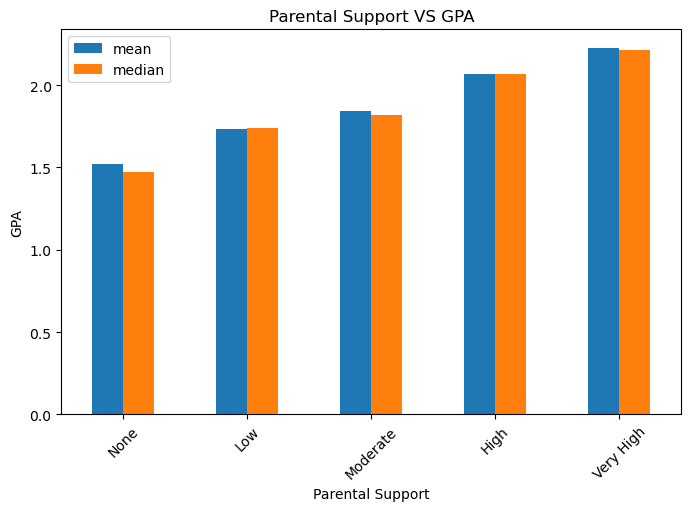

In [ ]:
ax =groupbyParentalSupport.plot.bar(figsize = (8,5))
# figsize sets size of plot
ax.set_xticklabels(groupbyParentalSupport['ParentalSupport'],rotation = 45)

plt.xlabel('Parental Support')
# setting a label for x axis
plt.ylabel('GPA')
# Setting a label for y axis
plt.title('Parental Support VS GPA')
# Setting the title of chart
plt.show()

- According to the bar chart, when the parental support increases, both mean and median of the GPA shows an increasing trend
- The mean and median values of each level of parental support are very similar thus the distribution is fairly symmetrical for each group
- This relationship may be because students who get more parental support are generally more confident in their studies and receive better care

3. Calculate the average GPA for students who receive Tutoring versus those who don't.
Visualise the results using a barchart and explain what you observe.

In [ ]:
fun4 = {'GPA':'mean'}
groupbyTutoring = student_list.groupby('Tutoring').agg(fun4)
groupbyTutoring

,GPA
Tutoring,
No,1.804967
Yes,2.123106


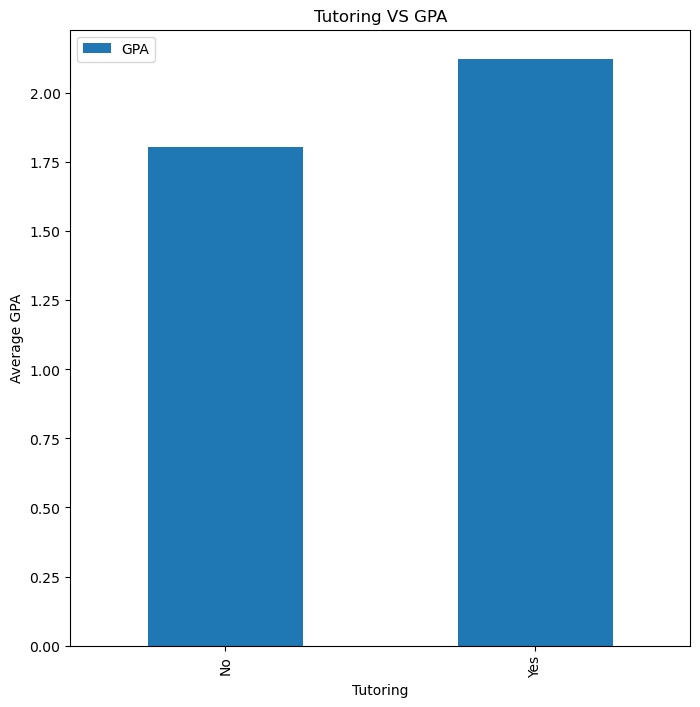

In [ ]:
groupbyTutoring = groupbyTutoring.reset_index()
ax = groupbyTutoring.plot.bar(figsize = (8,8))
ax.set_xticks(range(len(groupbyTutoring)))
ax.set_xticklabels(groupbyTutoring['Tutoring'])

plt.xlabel('Tutoring')
# setting a label for x axis
plt.ylabel('Average GPA')
# Setting a label for y axis
plt.title('Tutoring VS GPA')
# Setting the title of chart
plt.show()

- Based on the bar chart, students who receive tutoring have higher average GPA (slightly above 2.0) compared to those who don't (slightly above 1.75)
- This may be because students who receive tutoring get more practice and are more well-versed in using answering techniques to tackle exam questions